In [1]:
import numpy as np
import arviz as az
import matplotlib.pyplot as plt
import corner
%matplotlib inline

In [5]:
data_HMC = np.load('../data/chains_HMC.npz')
data_gaussian = np.load('../data/chains_emcee.npz')
print(data_HMC.files)
HMC_bestchain = data_HMC['chains'][np.argmax(data_HMC['log_prob'][:,-1])]
# gaussian_bestchain = data_gaussian['chains'][np.argmax(data_gaussian['log_prob'][:,-1])]
gaussian_bestchain = data_gaussian['chain']
# list(data_gaussian.keys())

['chains', 'log_prob', 'local_accs', 'global_accs']


In [13]:
gaussian_bestchain

array([[24.49458443, 24.49458443, 24.49458443, ..., 23.55405726,
        23.55405726, 23.55405726],
       [23.84776948, 23.84776948, 24.71079042, ..., 24.41716145,
        24.3847824 , 24.3847824 ],
       [21.56413279, 21.56413279, 21.65275168, ..., 23.82628913,
        23.82942576, 23.82942576],
       ...,
       [23.83447307, 23.83447307, 23.83447307, ..., 24.47619759,
        24.47619759, 24.47619759],
       [22.90786943, 22.90786943, 22.93798644, ..., 20.87051951,
        20.87051951, 20.87051951],
       [22.31698602, 22.31698602, 22.31698602, ..., 21.13896234,
        21.13896234, 21.13896234]])

In [6]:
print(list(data_gaussian.keys()))

['chains', 'chain']


In [7]:
data_HMC['chains'].shape
# HMC_bestchain.shape
# gaussian_bestchain.shape

(4, 20000, 7)

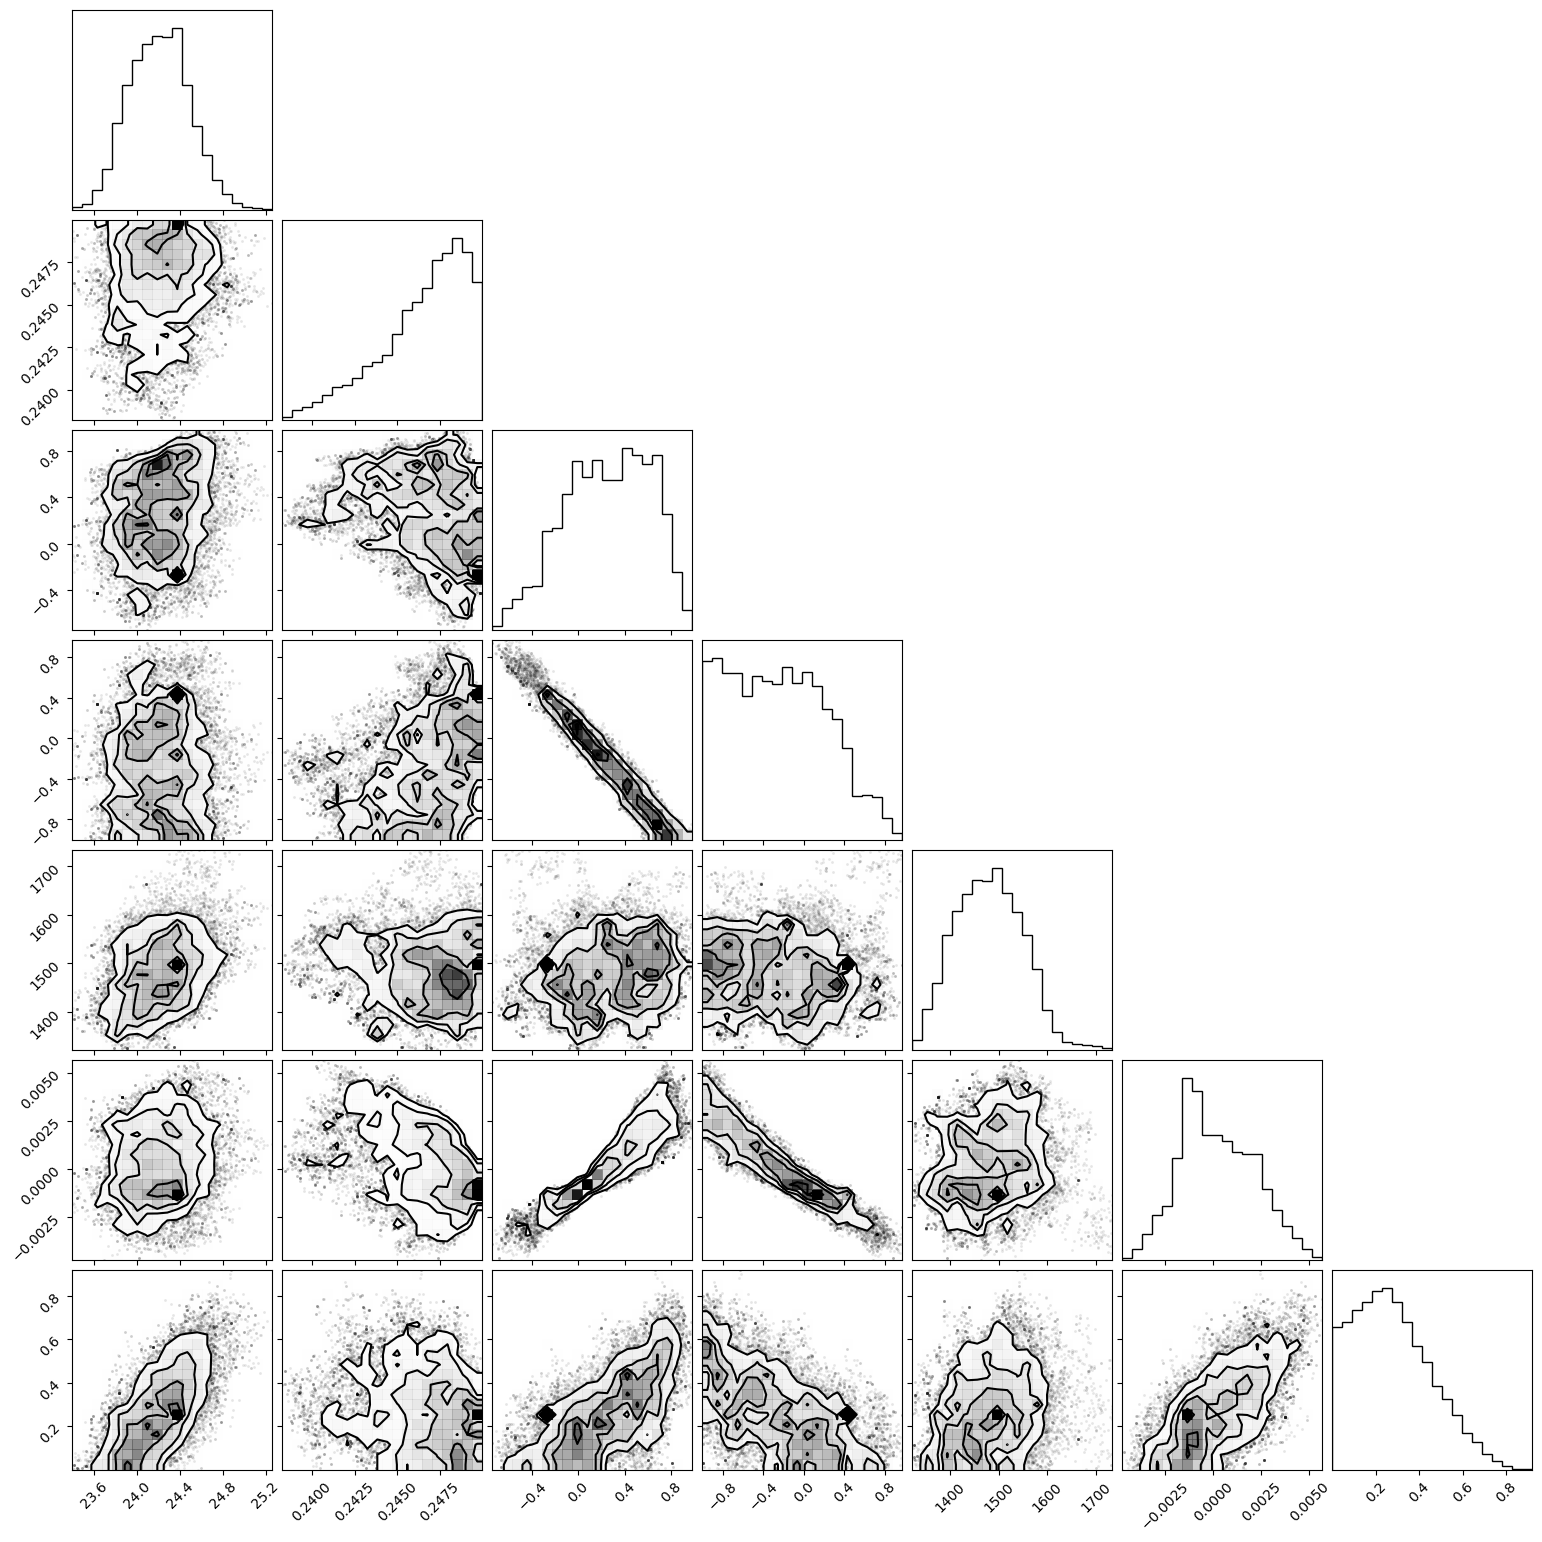

In [9]:
fig_HMC = corner.corner(HMC_bestchain)
# fig_gaussian = corner.corner(gaussian_bestchain)

In [20]:
acl_HMC = az.autocorr(HMC_bestchain.T).T
acl_gaussian = az.autocorr(gaussian_bestchain.T).T
print(acl_HMC.shape, acl_gaussian.shape)

(20000, 7) (30000, 7)


Text(0, 0.5, 'Autocorrelation')

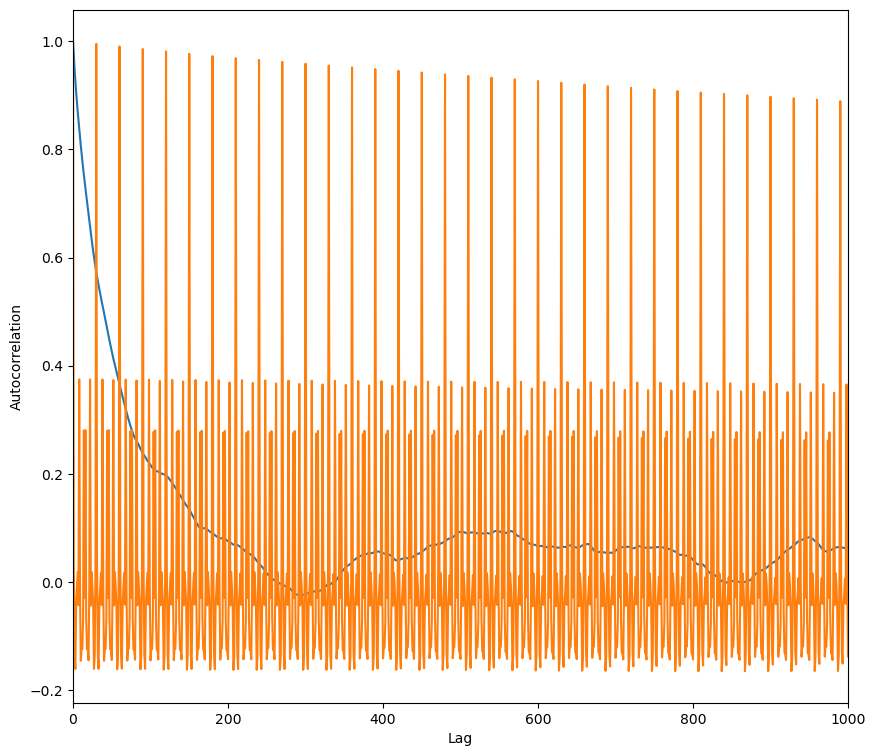

In [21]:
plt.figure(figsize=(10,9))
plt.plot(acl_HMC[:,0], label='HMC')
plt.plot(acl_gaussian[:,0], label='Gaussian')
plt.xlim(0,1000)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')

In [9]:
for i in range(7):
    print(az.ess(HMC_bestchain[:,i])/ az.ess(gaussian_bestchain[:,i]))

6.480399435355315
6.799610703243216
1.4329754558631473
1.689207222409115
0.44491268066214607
2.4053670521307584
4.527583519025597
